In [1]:
from Regression import Regression
from Franke import Franke, FrankeNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams['figure.figsize'] = [6.0, 6.0]
mpl.rcParams["font.size"] = 14

np.random.seed(1942)

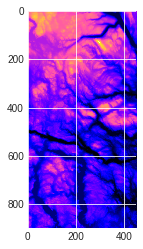

In [2]:
terrain1 = imread("../input_data/SRTM_data_Norway_1.tif")[::4, ::4]
plt.imshow(terrain1);

In [3]:
reg = Regression()
reg.load_matrix_data(terrain1)

In [5]:
data_pred = reg.solveKFold(K=10, poly_order=10, solver="Ridge", lamda=1e-4)

32031348.313307855
32023324.17691869
31958470.17305953
31976246.170629386
32077409.46925834
32002255.820995435
32003473.28181695
32040231.27921367
31975358.539739344
32019148.22693266


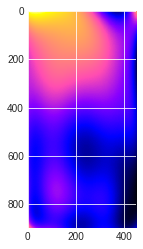

In [6]:
plt.imshow(data_pred);

 29%|██▊       | 2/7 [00:00<00:00, 13.32it/s]

7
5.287555159492268
cond XT*X:  27.95823956467341
28.992040692144887
cond XT*X:  840.5384234949466


 43%|████▎     | 3/7 [00:00<00:00,  5.32it/s]

913.1327759039162
cond XT*X:  833811.4664155535
969031.4697796879
cond XT*X:  939032989346.0013


 57%|█████▋    | 4/7 [00:02<00:02,  1.44it/s]

1176459776374.9268
cond XT*X:  1.6124676394567266e+19


 71%|███████▏  | 5/7 [00:12<00:06,  3.47s/it]

2.899691619464201e+17
cond XT*X:  1.1330046646336098e+21


 86%|████████▌ | 6/7 [00:49<00:13, 13.55s/it]

2.3341738104014234e+18
cond XT*X:  1.3144825488416637e+21


100%|██████████| 7/7 [05:04<00:00, 86.05s/it]


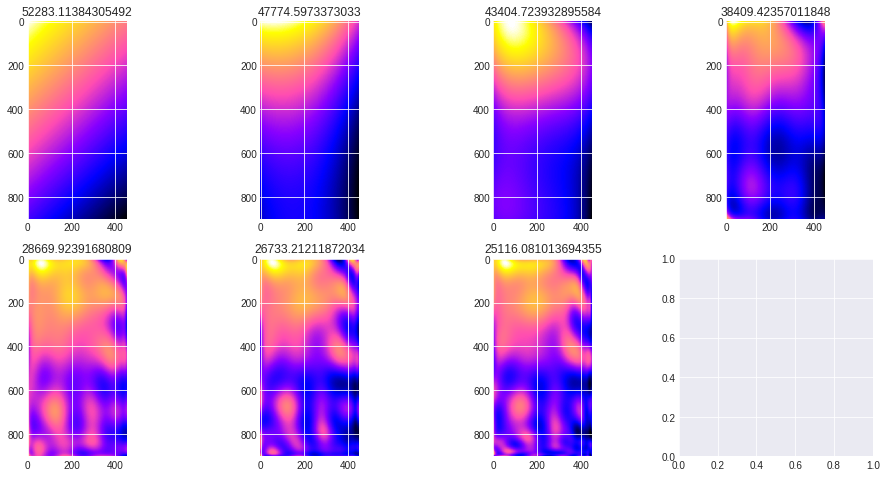

In [28]:
err_list = []
poly_orders = 2**np.arange(0, 7, 1)
nr_poly_orders = len(poly_orders)

fig, ax = plt.subplots((nr_poly_orders+3)//4, 4, figsize=(16, 4*((nr_poly_orders+3)//4)))
print(nr_poly_orders)

for i in trange(len(poly_orders)):
    poly_order = poly_orders[i]
    beta = reg.solveCoefficients(poly_order=poly_order, solver="OLS")
    data_pred = reg.apply_model(beta, reg.x_mesh, reg.y_mesh, poly_order=poly_order)
    ax[i//4, i%4].imshow(data_pred)
    ax[i//4, i%4].set_title(MSE(data_pred, reg.f))
    err_list.append(MSE(reg.f, data_pred))

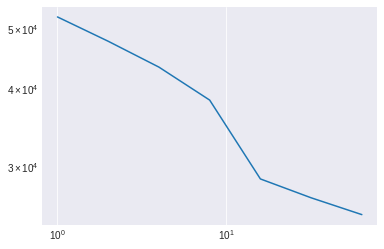

In [30]:
plt.loglog(poly_orders, err_list)